In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("yelp.csv", index_col=0)
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [16]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [17]:
data["stars"].value_counts()

stars
5    7532
1    2468
Name: count, dtype: int64

In [18]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [19]:
data = data[["stars", "text"]]

In [20]:
data.head()

,stars,text
2967245,5,LOVE the cheeses here. They are worth the pri...
4773684,5,This has become our go-to sushi place. The sus...
1139855,1,I was very disappointed with the hotel. The re...
3997153,5,Love this place - super amazing - staff here i...
4262000,5,Thank you Dana!!!! Having dyed my hair black p...


In [21]:
data.iloc[0]["text"]

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [22]:
# 5점 리뷰와 1점 리뷰는 어느 텍스트가 더 길까?

In [41]:
data["text_length"] = data["text"].apply(len)

In [42]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text_length
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0,141
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


In [27]:
# stars 에 따른 text_length의 평균을 알아보자

In [31]:
data[["stars", "text_length"]].groupby("stars").mean()

,text_length
stars,
1,790.700972
5,500.135688


<Axes: xlabel='stars', ylabel='count'>

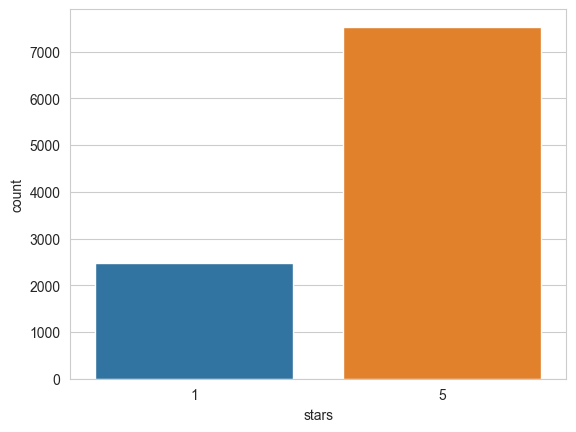

In [36]:
sns.countplot(data=data, x="stars")

In [37]:
#전체 텍스트들의 길이를 히스토그램으로 그려보자.

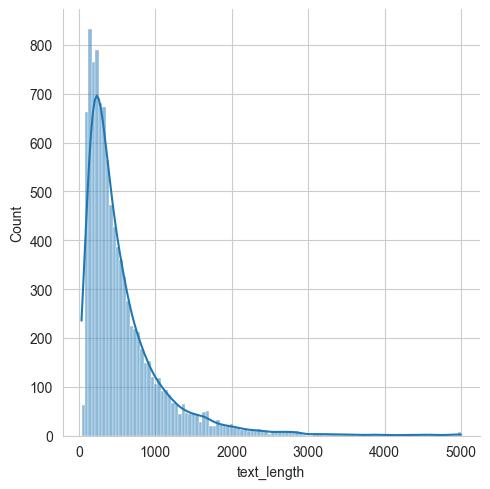

In [39]:
sns.displot(data["text_length"], kde=True)

In [43]:
# 변수들간의 상관관계 분석

In [44]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', 'text_length'],
      dtype='object')

In [46]:
data.drop(["review_id", "user_id", "business_id", "date", "text"], inplace=True, axis=1)

In [47]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


<Axes: >

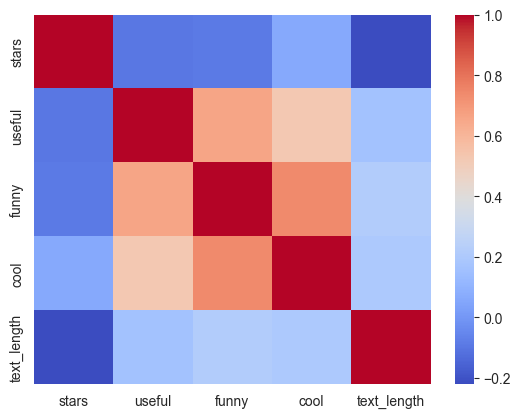

In [49]:
sns.heatmap(data.corr(), cmap="coolwarm")

In [51]:
import string

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
data["text"].head()

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
Name: text, dtype: object

In [57]:
s = data["text"].iloc[0]

In [58]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [62]:
s.replace(".", "").replace(",", "").replace("!", "").split()

['LOVE',
 'the',
 'cheeses',
 'here',
 'They',
 'are',
 'worth',
 'the',
 'price',
 'Great',
 'for',
 'finding',
 'treats',
 'for',
 'a',
 'special',
 'dinner',
 'or',
 'picnic',
 'Nice',
 'on',
 'sample',
 'days',
 'Yum',
 'Top',
 'quality',
 'meats',
 'Nice',
 'selection',
 'of',
 'non',
 'brand',
 'frozen',
 'veggies',
 'Veggie',
 'chips',
 'are',
 'mega',
 'tasty',
 'Always',
 'quick',
 'and',
 'friendly',
 'check',
 'out',
 'Produce',
 'not',
 'as',
 'stellar',
 'as',
 'it',
 'once',
 'was',
 'but',
 'also',
 'not',
 'finding',
 'better',
 'in',
 'Madison']

In [64]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
# data의 text칼럼의 모든 text에서 punctuation에 해당하는 기호를 제거해보자.

In [ ]:
def remove_punc(x):
    # 부호 제거 후
    # x 리턴
    pass

In [66]:
s = s.replace(".", "")

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [68]:
def remove_punc(x):
    for i in string.punctuation:
        x = x.replace(i, "")
    return x

In [69]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [70]:
remove_punc(s)

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [73]:
data["text"] = data["text"].apply(remove_punc)

In [74]:
def remove_punc2(x):
    new_x = ""
    for i in x:
        if i in string.punctuation:
            pass
        else:
            new_x += i

In [75]:
data["text"].iloc[1]

'This has become our goto sushi place The sushi is always fresh and delicious We get the 30 sushi platter which is perfect for two people The service is always fast and the servers are pleasant They give you salads and potatoes while you wait for your food which is a nice touch After your meal they bring you little bottles of korean yoghurt which is also delicious'

In [76]:
%pip install nltk
import nltk

In [77]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hkit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords

In [81]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
def remove_swords(x):
    new_list = []
    for i in x.lower().split(" "):
        if i not in stopwords.words("english"):
            if i == "":
                pass
            else:
                new_list.append(i)
    return new_list

In [104]:
data["text"].iloc[0]

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [105]:
remove_swords(data["text"].iloc[0])

['love',
 'cheeses',
 'worth',
 'price',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic',
 'nice',
 'sample',
 'days',
 'yum',
 'top',
 'quality',
 'meats',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies',
 'veggie',
 'chips',
 'mega',
 'tasty',
 'always',
 'quick',
 'friendly',
 'check',
 'produce',
 'stellar',
 'also',
 'finding',
 'better',
 'madison']

In [106]:
data["text"] = data["text"].apply(remove_swords)

In [107]:
data["text"].iloc[9999]

['awesome',
 'food',
 'awesome',
 'beer',
 'awesome',
 'service',
 'need',
 'say',
 'go',
 'see',
 'local',
 'bar',
 'vibes',
 'drafts',
 'everywhere']

In [111]:
word_list = []

for i in range(len(data)):
    word_list += data.iloc[i]["text"]

In [112]:
word_list[:100]

['love',
 'cheeses',
 'worth',
 'price',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic',
 'nice',
 'sample',
 'days',
 'yum',
 'top',
 'quality',
 'meats',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies',
 'veggie',
 'chips',
 'mega',
 'tasty',
 'always',
 'quick',
 'friendly',
 'check',
 'produce',
 'stellar',
 'also',
 'finding',
 'better',
 'madison',
 'become',
 'goto',
 'sushi',
 'place',
 'sushi',
 'always',
 'fresh',
 'delicious',
 'get',
 '30',
 'sushi',
 'platter',
 'perfect',
 'two',
 'people',
 'service',
 'always',
 'fast',
 'servers',
 'pleasant',
 'give',
 'salads',
 'potatoes',
 'wait',
 'food',
 'nice',
 'touch',
 'meal',
 'bring',
 'little',
 'bottles',
 'korean',
 'yoghurt',
 'also',
 'delicious',
 'disappointed',
 'hotel',
 'restaurants',
 'good',
 'booked',
 'eiffel',
 'tower',
 'view',
 'got',
 'room',
 'view',
 'paid',
 'extra',
 'view',
 'put',
 'room',
 'view',
 '18th',
 'floor',
 'excited',
 'pool',
 'plays',
 'loud',
 'music',

In [113]:
from nltk.probability import FreqDist

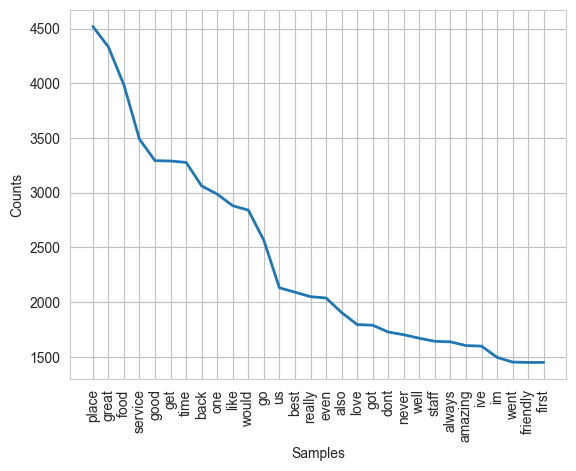

<Axes: xlabel='Samples', ylabel='Counts'>

In [116]:
FreqDist(word_list).plot(30)

In [118]:
from wordcloud import WordCloud

In [119]:
wc = WordCloud()

In [128]:
wc.generate(str(word_list).replace("'", ""))

(-0.5, 399.5, 199.5, -0.5)

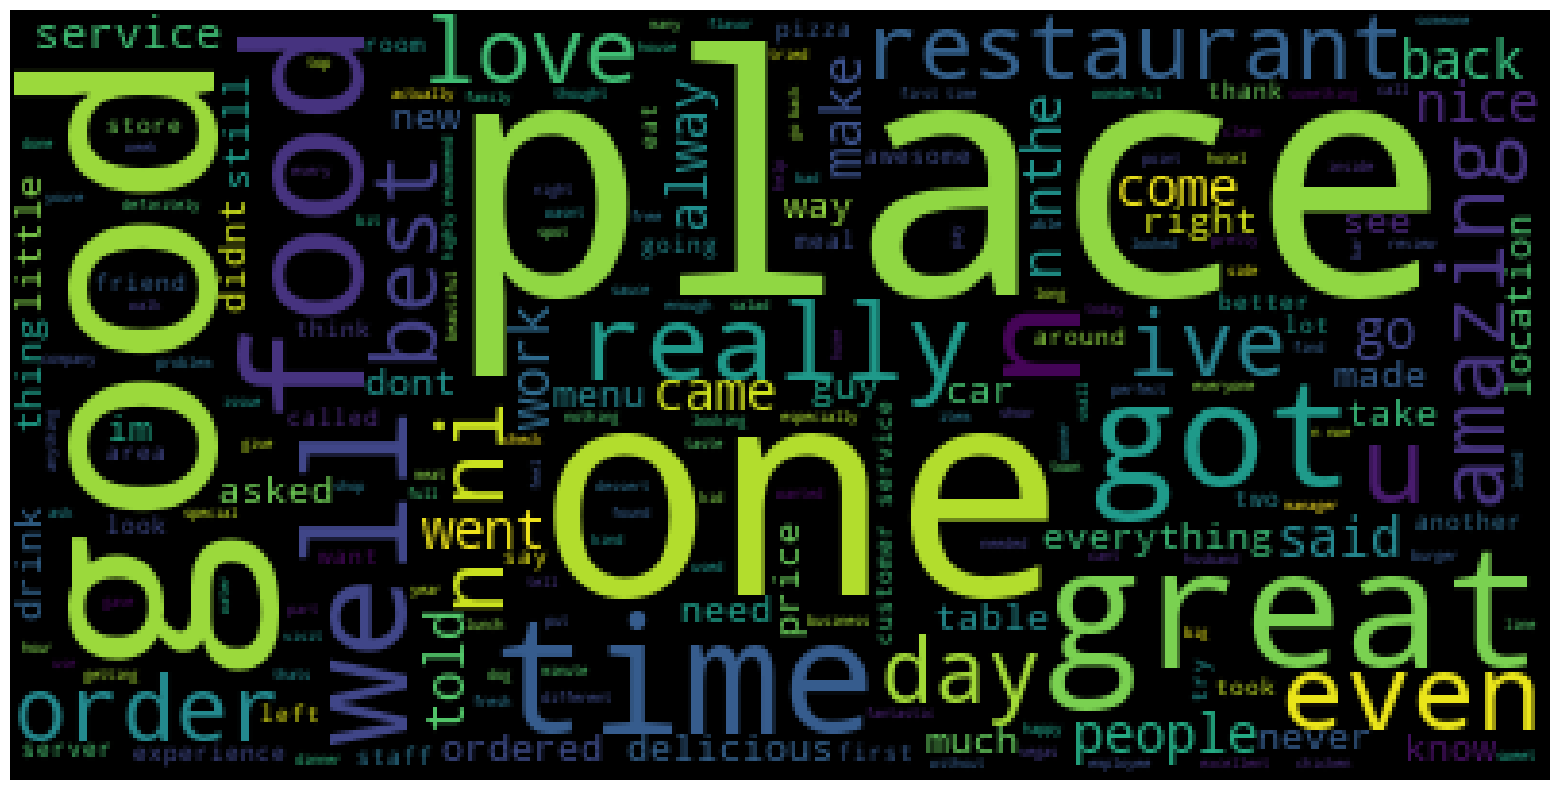

In [129]:
# %pip install matplotlib
# import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")

In [131]:
# good = data["리뷰가5점이냐?"]["text"]
good = data[data["stars"] == 5]["text"]
bad = data[data["stars"] == 1]["text"]

In [133]:
bad

1139855    [disappointed, hotel, restaurants, good, booke...
3430878    [absolutely, worst, ever, place, filthy, manag...
2325929    [two, visits, salon, two, different, stylists,...
93710      [wifes, 2015, mustang, hit, rear, took, collis...
2365940    [worse, office, ever, deal, since, moving, val...
                                 ...                        
1867232    [first, nice, people, buuut, unimpressed, expe...
1709220    [omg, place, cant, get, things, right, takeout...
4573504    [someone, please, ask, gordon, ramsey, leave, ...
3157508    [isnt, restaurant, cafe, like, someone, house,...
4910763    [extremely, rude, staff, told, 4, min, large, ...
Name: text, Length: 2468, dtype: object

In [135]:
wc = WordCloud().generate(str(good))
plt.imshow(wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

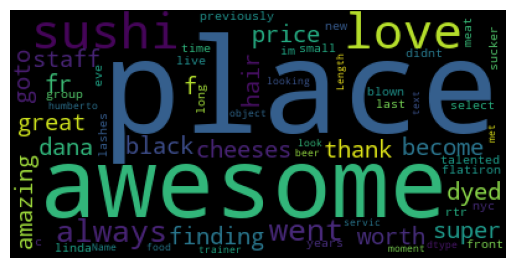

In [136]:
plt.imshow(wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

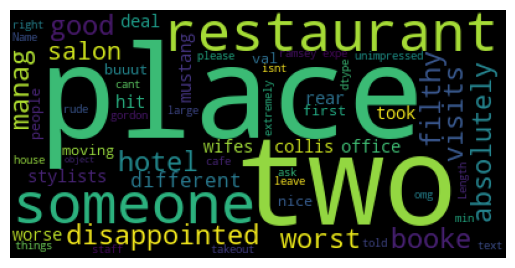

In [137]:
wc = WordCloud().generate(str(bad))
plt.imshow(wc)
plt.axis("off")

In [143]:
import string

In [144]:
import matplotlib.pyplot as plt

In [145]:
text = """존경하는 하원의장님, 부통령님, 상·하원 의원 여러분과 내외 귀빈 여러분, 미국 시민 여러분. "자유 속에 잉태된 나라, 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라." 저는 지금 자유에 대한 확신, 동맹에 대한 신뢰, 새로운 미래를 열고자 하는 결의를 갖고 미국 국민 앞에 서 있습니다.
미 의회는 234년 동안 자유와 민주주의의 상징이었습니다. 미 헌법 정신을 구현하고 있는 바로 이곳에서 의원 여러분과 미국 국민 앞에 연설하게 되어 매우 기쁘게 생각합니다. 특히 '한미동맹 70주년 결의'를 채택하여 이번 저의 방문의 의미를 더욱 빛내주신 민주당과 공화당 양당 의원 여러분께도 깊은 감사의 말씀을 드립니다. 특히 '한미동맹 70주년 결의'를 채택하여 이번 저의 방문의 의미를 더욱 빛내주신 민주당과 공화당 양당 의원 여러분께도 깊은 감사의 말씀을 드립니다.
여러분께서 어떤 진영에 계시든 간에, 저는 여러분이 대한민국 편에 서 계신다는 사실을 잘 알고 있습니다. 지난 세기 동안 미국은 자유를 위협하는 도전에 맞서 이를 수호하는 데 앞장섰습니다. 제국주의 세력 간의 식민지 쟁탈전이 격화되면서 인류는 두 차례의 참혹한 대전을 겪었습니다. 미국은 자유를 지키기 위한 정의로운 개입을 택했습니다. 이로 인해 미국이 치른 희생은 적지 않았습니다. 맥아더 장군과 니미츠 제독이 활약한 태평양 전쟁에서만 10만 명이 넘는 미국 국민이 전사했습니다.
그러나 이들의 희생은 헛되지 않았습니다. 전후 세계 자유무역 질서를 구축한 미국의 글로벌 리더십은 세계 곳곳에서 평화와 번영을 일구었습니다. 하지만 자유시장을 허용하지 않는 공산 전체주의 세력이 참여하지 않은 자유시장의 번영이었습니다.
1950년 한반도는 자유주의와 공산 전체주의가 충돌하는 최전선이었습니다. 소련의 사주를 받은 북한의 기습침략으로 한반도와 아시아의 평화가 위기에 빠졌습니다. 한반도에서 자유민주주의가 사라질 뻔한 절체절명의 순간, 미국은 이를 외면하지 않았습니다. 한국과 미국은 용감히 싸웠고 치열한 전투가 이어졌습니다. 전쟁의 포화 속에서 영웅들의 이야기가 탄생했습니다.
맥아더 장군은 허를 찌르는 인천상륙작전으로 불리한 전황을 일거에 뒤집었습니다. 인천상륙작전은 세계 전사에 기록할만한 명장의 결정이었습니다. 미 해병대 1사단은 장진호 전투에서 중공군 12만 명의 인해 전술을 돌파하는 기적 같은 성과를 거두었습니다. '전혀 알지 못하는 나라의 한 번도 만난 적이 없는 국민'을 지키기 위해 미군이 치른 희생은 매우 컸습니다. 장진호 전투에서만 미군 4천500명이 전사했고, 6·25 전쟁에서 미군 약 3만7천명이 전사했습니다. 원주 324 고지전에 참전해 오른쪽 팔과 다리를 잃은 고(故) 윌리엄 웨버 대령은 한국전 참전용사의 숭고한 희생을 기리는 활동에 여생을 바쳤습니다.
오늘 이 자리에 웨버 대령의 손녀 데인 웨버씨를 모셨습니다. 어디 계신 지 일어나 주시겠습니까? 대한민국 국민을 대표해 깊은 감사와 무한한 경의를 표합니다.
여기 계신 의원 여러분들의 가족과 친구 중에도 한국전 참전용사 영웅들이 계실 것입니다. 한국전쟁 참전 용사로 바로 이곳 의회에서 자유와 민주주의를 위해 헌신하신 고(故) 존 코니어스 의원님, 故 샘 존슨 의원님, 故 하워드 코블 의원님 그리고 지금도 한미동맹의 열렬한 후원자이신 찰스 랭글 전 의원님. 대한민국은 우리와 함께 자유를 지켜낸 미국의 위대한 영웅들을 영원히 기억하겠습니다.
오늘 이 자리를 빌려 한국전쟁 참전용사들과 자식과 남편, 그리고 형제를 태평양 너머 한 번도 가본 적 없는 나라의 자유를 지키기 위해 기꺼이 보내준 미국의 어머니들, 그리고 한국전쟁을 자랑스러운 유산으로 여기고 참전 용사들을 명예롭게 예우하는 미국 정부와 국민에게 깊은 경의를 표합니다.
3년간의 치열했던 전투가 끝나고 한미 양국은 1953년 한미상호방위조약을 체결하면서 새로운 동맹의 시대를 열었습니다. 전쟁의 참혹한 상처와 폐허를 극복하고 번영하는 오늘의 대한민국이 있기까지 미국은 우리와 줄곧 함께했습니다. 올해로 70주년을 맞이한 한미동맹을 축하해야 할 이유는 너무나 많습니다. 처음부터 성공한다는 보장은 없었습니다.
하지만 오늘날 우리의 동맹은 어느 때보다 강력하며, 함께 번영해나가고 있습니다. 그리고 우리 두 나라는 그 누구보다도 서로 긴밀하게 연결돼있습니다. 한미동맹은 대한민국의 자유와 평화를 지키고 번영을 일구어 온 중심축이었습니다.
현대 세계사에서 '도움을 받는 나라에서 도움을 주는 나라'로 발돋움한 유일한 사례인 대한민국은 한미동맹의 성공 그 자체입니다. 저는 오늘 이 자리에서 1882년 수교에서 시작된 140년의 한미 양국의 교류와 협력, 그리고 동맹의 역사를 되새겨보고자 합니다. 대한민국 헌법의 기초가 된 자유와 연대의 가치는 19세기 말 미국 선교사들의 노력에 의해 우리에게 널리 소개되었습니다. 그리고 그 후 우리 국민의 독립과 건국 운동에 큰 영향을 미쳤습니다.
19세기 말 한국에 온 호러스 언더우드, 헨리 아펜젤러, 메리 스크랜튼, 로제타 홀 등 미국의 선교사들은 학교와 병원을 지었습니다. 특히 이들은 여성 교육에 힘썼고, 그 결과 한국 역사상 최초로 여성들이 교육, 언론, 의료 등 다양한 분야의 사회 활동에 진출하는 기반을 닦아주었습니다.
1960년대 초반에 박정희 대통령은 현명하게도 케네디 행정부가 권고한 로스토우 교수의 경제성장 모델을 받아들여 경제개발 계획을 추진하고 신흥 산업 국가의 기반을 마련했습니다. '한강의 기적'으로 불릴 만큼 한국의 경제성장 속도는 타의 추종을 불허했습니다. 1인당 소득 67불의 전후 최빈국이었던 대한민국은 세계 10위권의 경제 대국으로 성장했습니다. 전쟁으로 잿더미가 되었던 수도 서울은 70년이 지난 지금 세계에서 가장 활기찬 디지털 국제도시가 됐습니다. 전쟁 중 피난민이 넘쳤던 부산은 환적 물량 기준 세계 2위의 항만 도시가 되었고, 이제 2030년 세계박람회 유치를 위해 뛰고 있습니다.
대한민국은 이제 자유와 민주주의가 살아 숨 쉬는 활력 넘치는 나라로 세계시민의 사랑을 받고 있습니다. 한미 양국은 한반도를 넘어 전 세계의 자유와 민주주의 수호를 위해 힘을 모아왔습니다. 대한민국은 2차대전 후 아프간, 이라크 등지에 '자유의 전사'를 파견하여 미국과 함께 싸웠습니다.
지난 70년간 동맹의 역사에서 한미 양국은 군사 안보 협력뿐 아니라 경제 협력도 지속적으로 확대해왔습니다. 초기의 일방적인 지원에서 상호 호혜적인 협력관계로 발전해온 것입니다. 2011년 미 의회의 전폭적인 지지로 통과된 한미 FTA가 가동된 이후 10년간 양국 교역액은 약 68% 증가했고, 우리 기업의 대미 투자는 3배, 미국 기업의 대한국 투자는 2배 가까이 늘었습니다.
배터리, 반도체, 자동차 등의 분야에서 미국에 진출한 글로벌 한국 기업들은 미국 내 양질의 일자리 창출과 경제 활성화에 기여하고 있습니다. 텍사스주 오스틴에 위치한 삼성전자 반도체 공장은 2020년 기준 약 1만개의 일자리를 창출했으며, 2024년 하반기부터 가동될 조지아주 브라이언 카운티 현대차 공장도 연간 30만대의 전기차와 수많은 일자리를 만들어낼 것입니다. 지난해 11월 바이든 대통령께서 방문한 미시간주 베이시티 SK실트론 CSS는 한국 기업이 미국 회사를 인수해 성장시키는 또 다른 모범 협력 사례입니다. 이러한 호혜적 한미 경제 협력이 곳곳에서 이어질 수 있도록 의원 여러분들의 각별한 관심과 지원을 부탁드립니다.
친구 여러분, 정치와 경제 분야의 협력을 통해 축적된 양국의 활발한 문화 인적 교류는 두 나라의 우정을 보다 두텁게 했습니다. 올해는 미주 한인 이주 120주년이기도 합니다. 하와이주 사탕수수 농장의 노동자로 진출하기 시작한 한인들은 그동안 미국 사회 각계에 진출해 한미 우호 협력을 증진하고 동맹의 역사를 만들어가는 데 큰 역할을 했습니다. 바로 이 자리에 계신 영 킴 의원님, 앤디 킴 의원님, 미셸 스틸 의원님, 그리고 메릴린 스트릭랜드 의원님 같은 분들이 세대를 이어온 한미동맹의 증인들이십니다. 두 분씩 민주당·공화당 의원님이십니다.
문화 콘텐츠는 양국 국민이 국적과 언어의 차이를 넘어 더욱 깊은 이해와 우정을 쌓는 촉매제가 되고 있습니다. 한국 영화 기생충과 미나리가 아카데미 수상을 하고, 탑건·어벤져스와 같은 수많은 할리우드 영화가 이미 오래전부터 한국에서 엄청난 사랑을 받아왔습니다. 저도 탑건 매버릭을 굉장히 좋아하고 미션임파서블을 굉장히 좋아합니다. 그리고 제 이름은 모르셨어도 BTS와 블랙핑크는 알고 계셨을 겁니다. BTS가 저보다 백악관을 더 먼저 왔지만, 의회는 제가 먼저 왔네요.
이제 한미 양국의 음악 차트에서 상대방 국가의 가수 노래가 순위에 오르는 모습이 자연스러운 일이 되었습니다. 미국이 넷플릭스와 같은 글로벌 플랫폼을 만들고, 한국이 오징어게임과 같은 킬러 콘텐츠를 생산해 공급하는 새로운 양상의 시너지 효과도 나타나고 있습니다.
문화 교류의 활성화로 양국 국민의 관계 또 더욱 가까워졌습니다. 지난해 시카고 국제문제연구소 여론조사에 따르면 미국인의 한국에 대한 호감도가 1978년 이후 가장 높은 것으로 조사됐습니다. 또한 미 여론조사기관 퓨리서치센터에 따르면 지난해 미국에 대한 한국인의 호감도는 89%에 달했으며, 그 증가 폭은 조사대상국 중 가장 크다고 합니다. 이제 한미 양국 청년들이 더욱 활기차게 오가며 공부하고 교육받으며, 직장을 찾을 수 있도록 한미 정부가 함께 체계적인 지원 프로그램을 마련하기로 하였습니다.
의원 여러분, 제 평생의 직업은 두 가지였습니다. 첫 번째 직업은 대한민국 검사이고, 두 번째 직업은 사랑하는 나의 조국 대한민국의 대통령입니다. 검사 시절, 저의 롤모델은 드라마 'Law ＆ Order'에 나오는 애덤 쉬프 검사의 실제 모델인 로버트 모겐소였습니다. 저는 검찰총장 재직 시 '미국의 영원한 검사 로버트 모겐소'라는 책을 출간해서 후배 검사들에게 나눠준 적도 있습니다.
발간사에도 모겐소의 명언인 "거악에 침묵하는 검사는 동네 소매치기도 막지 못할 것"이라는 문구를 적었습니다. 지금 우리의 민주주의는 위기에 직면해있습니다. 민주주의는 자유와 인권을 보장하기 위한 공동체의 정치적 의사결정 시스템입니다. 이러한 의사결정은 진실과 자유로운 여론 형성에 기반해야 합니다.
세계 도처에서 허위 선동과 거짓 정보가 진실과 여론을 왜곡하여 민주주의를 위협하고 있습니다. 법의 지배는 공동체 구성원들의 자유가 공존하는 방식이며, 의회민주주의에 의해 뒷받침됩니다. 허위 선동과 거짓 정보로 대표되는 반지성주의는 민주주의를 위협할 뿐 아니라 법의 지배마저 흔들고 있습니다.
이들 전체주의 세력은 자유와 민주주의를 위협하고 부정하면서도 마치 자신들이 민주주의 운동가, 인권 운동가인 양 정체를 숨기고 위장하는 경우가 대부분입니다. 우리는 이런 은폐와 위장에 속아서는 안 됩니다. 피와 땀으로 지켜온 소중한 민주주의와 법의 지배 시스템이 거짓 위장 세력에 의해 무너지지 않도록 우리 모두 힘을 합쳐 용감하게 싸워야 합니다.
자유를 소중히 여기는 사람은 다른 사람의 자유도 소중하게 생각합니다. 따라서 자유는 평화를 만들고 평화는 자유를 지켜줍니다. 그리고 자유와 평화는 창의와 혁신의 원천이고, 번영과 풍요를 만들어냅니다. 70여 년 전 대한민국의 자유를 위해 맺어진 한미동맹은 이제 세계와 자유의 평화를 지키는 글로벌 동맹으로 발전했습니다. 대한민국은 국제사회에서 대한민국의 신장된 경제적 역량에 걸맞은 책임과 기여를 다할 것입니다.
케네디 대통령은 1961년 취임식에서 "세계시민 여러분, 우리가 여러분을 위해 무엇을 해줄 것인가를 묻지 마십시오. 인류의 자유를 위해 우리가 힘을 모아 무엇을 할 수 있을지를 물으십시오."라고 말했습니다. 이제 인류의 자유를 위해 대한민국이 국제사회와 힘을 모아 해야 할 일을 반드시 할 것입니다.
대한민국은 미국과 함께 미래로 나아갈 것입니다. 저는 지난해 취임하면서 대한민국을 자유민주주의와 시장경제를 기반으로 국민이 주인인 나라로 만들고 국제사회의 당당한 일원으로서 역할과 책임을 다하는 존경받는 나라, 자랑스러운 조국으로 만들어 가겠다는 소명을 밝혔습니다. 대한민국은 미국과 함께 세계시민의 자유를 지키고 확장하는 '자유의 나침반' 역할을 해나갈 것입니다.
한미 양국의 자유를 향한 동맹이 70년간 이어지는 동안에도 이와 정반대의 길을 고집하는 세력이 있습니다. 바로 북한입니다. 자유민주주의를 선택한 대한민국과 공산 전체주의를 선택한 북한은 지금 분명히 비교되고 있습니다.
북한은 자유와 번영을 버리고 평화를 외면해 왔습니다. 북한의 불법적 핵 개발과 미사일 도발은 한반도와 세계 평화에 대한 심각한 위협입니다. 북한의 무모한 행동을 확실하게 억제하기 위해서는 무엇보다도 한미의 단합된 의지가 중요합니다. 레이건 대통령이 말한 바와 같이 "우리가 용납할 수 없는 지점이 있으며, 절대로 넘어서는 안 될 선이 있다"는 것을 북한에게 분명하게 알려줘야 합니다.
어제 열린 정상회담에서 저와 바이든 대통령은 한층 강화된 확장억제 조치에 합의했습니다. 날로 고도화되는 북핵 위협에 대응하기 위해 한미 공조와 더불어 한미일 3자 안보 협력도 더욱 가속화 해야 합니다. 우리 정부는 도발에는 단호히 대응하되 비핵화를 위한 대화의 문을 열어둘 것입니다.
저는 지난해 북한이 핵 개발을 중단하고 실질적 비핵화 프로세스로 전환한다면 북한의 민생과 경제를 획기적으로 개선하겠다는 '담대한 구상'을 제안했습니다. 북한이 하루빨리 도발을 멈추고 올바른 길로 나오기를 다시 한번 촉구합니다.
한미 양국은 북한의 비핵화를 이끌어내기 위한 노력을 함께 기울여 나갈 것입니다. 북한 정권이 핵·미사일 개발에 몰두하는 사이 북한 주민들은 최악의 경제난과 심각한 인권 유린 상황에 던져지고 있습니다. 우리는 북한 주민의 비참한 인권 실상을 전 세계에 알리는 동시에, 북한 주민에게 자유를 전달하는 의무를 게을리해서는 안 됩니다.
지난달 대한민국 정부는 북한 인권보고서를 최초로 공개 발간했습니다. 보고서는 최근 5년간 북한 이탈주민 508명의 증언을 바탕으로 세계인권선언과 국제인권조약 등 국제적 기준을 적용해 북한 인권 유린 사례를 두루 담고 있습니다. 코로나19 방역 지침을 어겼다는 이유로 무자비하게 총살당한 사례, 한국의 영화와 드라마를 시청하고 유포했다고 공개 처형한 사례, 성경을 소지하고 종교를 가졌다는 이유만으로 공개 총살을 당한 사례 등 이루 말할 수 없는 참혹한 일들이 발생하고 있습니다.
국제사회는 이러한 북한 인권 유린의 참상을 널리 알려야 합니다. 여기에 계신 의원 여러분들도 북한 주민들의 열악한 인권이 개선될 수 있도록 함께 힘써주시길 바랍니다.
친구 여러분, 자유민주주의는 또다시 위협받고 있습니다. 우크라이나 전쟁은 국제규범을 어기고 무력을 사용해 일방적으로 현상을 변경하려는 시도입니다. 대한민국은 정당한 이유 없이 감행된 우크라이나에 대한 무력공격을 강력히 규탄합니다.
1950년 북한이 우리를 침공했을, 자유민주주의 국가들은 우리를 돕기 위해 달려왔습니다. 우리는 함께 싸워 자유를 지켰습니다. 그리고 그 결과는 역사가 말해주고 있습니다.
우리의 경험은 자유민주주의 국가들의 연대가 얼마나 중요한지 말해줍니다. 대한민국은 자유세계와 연대하여 우크라이나 국민의 자유를 수호하고 이들의 재건을 돕는 노력을 적극적으로 펴 나갈 것입니다.
의원 여러분, 이제까지 6명의 대한민국 대통령이 이 영예로운 자리에서 연설을 한 바 있습니다. 노태우 대통령은 1954년 대한민국 초대 대통령 이승만 박사가 이곳에서 연설한 지 35년 뒤인 1989년 여기 연단에 서서 이런 말을 했습니다. "태평양 연안 국가들은 개방 사회와 시장 경제를 통해 이 지역이 세계에서 가장 빠른 성장을 이루도록 만들었습니다. 미국에 태평양은 더욱 중요하게 될 것입니다. 한국은 이 지역의 평화와 번영에 더욱 기여하는 나라가 될 것입니다. 언젠가 한국의 대통령이 다시 이 자리에서 서서 오늘 내가 한 이야기가 내일의 꿈이 아니라 현실이 되고 있다고 말할 날이 올 것입니다."
노태우 대통령의 꿈은 이미 현실이 되었습니다. 우리는 지금 인도-태평양 시대에 살고 있습니다. 세계인구의 65%, 전 세계 GDP의 62%, 전 세계 해상 운송 물량의 절반이 이 지역에서 이루어지고 있습니다. 대한민국은 지난해 처음으로 포괄적 지역 전략인 '인도-태평양 전략'을 발표했습니다. 대한민국은 포용, 신뢰, 호혜의 원칙에 따라 '자유롭게 평화로우며 번영하는 인도·태평양 지역'을 만들어 나갈 것입니다.
인태 지역 내 규범 기반의 질서를 강화하기 위해 주요 파트너들과의 협력을 포괄적이고 중층적으로 확대해 나갈 것입니다. 그만큼 한미동맹이 작동하는 무대 또한 확장되는 것입니다. 미국 국제개발처 USAID 지원을 받던 한국은 이제 미국과 함께 개발도상국들에게 개발 경험을 전수해 주고 있습니다. 한국은 공적개발원조 규모를 대폭 확대하고 수혜국의 수요와 특성에 맞는 맞춤형 개발협력 프로그램을 제공하고 있습니다.
어제 열린 한미정상회담에서 저와 바이든 대통령은 '미래로 전진하는 행동하는 동맹'의 비전을 담은 공동성명을 채택했습니다. 양국은 외교 안보를 넘어 인공지능, 퀀텀, 바이오, 오픈랜 등 첨단분야 혁신을 함께 끌어 나갈 것입니다. 아울러, 양국의 최첨단 반도체 협력 강화는 안정적이고 회복력 있는 공급망 구축과 경제적 불확실성 해소에 기여할 것입니다.
양국은 동맹의 성공적 협력의 역사를 새로운 신세계인 우주와 사이버 공간으로 확장시켜 나가야 합니다. 세계에서 가장 혁신적이고 창의적인 두 기술 강국의 협력은 커다란 시너지 효과를 창출할 수 있을 것입니다.
존경하는 하원의장님, 부통령님, 상하원 의원 여러분, 한미 동맹은 자유, 인권, 민주주의라는 보편적 가치로 맺어진 가치동맹입니다. 우리의 동맹은 정의롭습니다. 우리의 동맹은 평화의 동맹입니다. 우리의 동맹은 번영의 동맹입니다. 우리의 동맹은 미래를 향해 계속 전진할 것입니다. 우리가 함께 만들어나갈 세계는 미래 세대들에게 무한한 기회를 안겨줄 것입니다. 여러분께서도 새로운 여정에 함께해주시길 당부합니다.
여러분과 미국의 앞날에 축복이, 그리고 우리의 위대한 동맹에 축복이 있기를 기원합니다. 감사합니다."""

In [146]:
text[:100]

'존경하는 하원의장님, 부통령님, 상·하원 의원 여러분과 내외 귀빈 여러분, 미국 시민 여러분. "자유 속에 잉태된 나라, 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라'

In [147]:
with open("yoon.txt", encoding="utf-8") as f:
    text = f.read()

In [148]:
text[:100]

'존경하는 하원의장님, 부통령님, 상·하원 의원 여러분과 내외 귀빈 여러분, 미국 시민 여러분. "자유 속에 잉태된 나라, 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라'

In [154]:
for i in string.punctuation:
    text = text.replace(i, "")

In [150]:
text[:100]

'존경하는 하원의장님 부통령님 상·하원 의원 여러분과 내외 귀빈 여러분 미국 시민 여러분 자유 속에 잉태된 나라 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라 저는 지금'

In [153]:
string.punctuation += "\n"

In [152]:
"\n" in text

True

In [159]:
text = text.replace("\n", " ").replace("있습니다", "").replace("합니다", "").replace("를", "")

In [160]:
text[:200]

'존경하는 하원의장님 부통령님 상하원 의원 여러분과 내외 귀빈 여러분 미국 시민 여러분 자유 속에 잉태된 나라 인간은 모두 평등하게 창조되었다는 신념에 의해 세워진 나라 저는 지금 자유에 대한 확신 동맹에 대한 신뢰 새로운 미래 열고자 하는 결의 갖고 미국 국민 앞에 서 미 의회는 234년 동안 자유와 민주주의의 상징이었습니다 미 헌법 정신을 구현하고 있는 '

In [161]:
from wordcloud import WordCloud

In [162]:
wc = WordCloud(font_path="malgun")

(-0.5, 399.5, 199.5, -0.5)

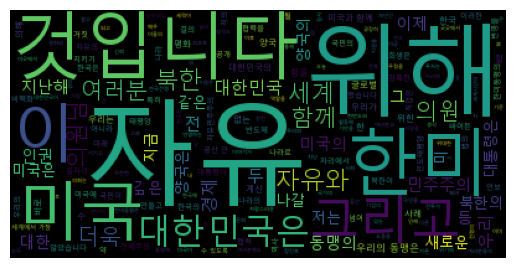

In [163]:
gen = wc.generate(text)
plt.imshow(gen)
plt.axis("off")

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [2]:
model = MultinomialNB()

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
data["text"].head()

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
Name: text, dtype: object

In [9]:
data["stars"].head()

2967245    5
4773684    5
1139855    1
3997153    5
4262000    5
Name: stars, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer()

In [12]:
cv.fit(data["text"])

CountVectorizer()

In [13]:
X = data["text"]
y= data["stars"]

X = cv.transform(X)

In [14]:
X

<10000x28253 sparse matrix of type '<class 'numpy.int64'>'
	with 679150 stored elements in Compressed Sparse Row format>

In [20]:
cv.get_feature_names_out()[3000]

'bentos'

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model

MultinomialNB()

In [23]:
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
accuracy_score(y_test, pred)

0.926

In [27]:
confusion_matrix(y_test, pred)

array([[ 447,   61],
       [  87, 1405]], dtype=int64)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86       508
           5       0.96      0.94      0.95      1492

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(max_depth=200, n_estimators=300)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, n_estimators=300)

In [83]:
pred = rf.predict(X_test)

In [84]:
accuracy_score(y_test, pred)

0.882

In [80]:
confusion_matrix(y_test, pred)

array([[ 285,  223],
       [  19, 1473]], dtype=int64)

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.45      0.61       508
           5       0.84      0.99      0.91      1492

    accuracy                           0.85      2000
   macro avg       0.90      0.72      0.76      2000
weighted avg       0.87      0.85      0.84      2000

